#**Exploratory Data Analysis For France Salary**

## **Introduction**
The **France_salary_data** dataset provides a comprehensive overview of salary distributions across various towns in France. This dataset includes detailed information about mean net salaries, categorized by different demographics and job roles. By analyzing this data, we can gain insights into the wage disparities between different groups such as gender, age, and job positions.

## **About Dataset**
The dataset contains the following features:

**CODGEO:** A unique code identifying each town.

**LIBGEO:** The name of the town.

**SNHM14:** The mean net salary across all job roles and demographics in the town.

**SNHMC14:** The mean net salary per hour for executives.

**SNHMP14:** The mean net salary per hour for middle managers.

**SNHME14:** The mean net salary per hour for employees.

**SNHMO14:** The mean net salary per hour for workers.

**SNHMF14:** The mean net salary for women across all job roles and demographics.

**SNHMFC14:** The mean net salary per hour for female executives.

**SNHMFP14:** The mean net salary per hour for female middle managers.

**SNHMFE14:** The mean net salary per hour for female employees.

**SNHMFO14:** The mean net salary per hour for female workers.

**SNHMH14:** The mean net salary for men across all job roles and demographics.

**SNHMHC14:** The mean net salary per hour for male executives.

**SNHMHP14:** The mean net salary per hour for male middle managers.

**SNHMHE14:** The mean net salary per hour for male employees.

**SNHMHO14:** The mean net salary per hour for male workers.

**SNHM1814:** The mean net salary per hour for individuals aged 18-25 years.

**SNHM2614:** The mean net salary per hour for individuals aged 26-50 years.

**SNHM5014:** The mean net salary per hour for individuals aged over 50 years.

**SNHMF1814:** The mean net salary per hour for women aged 18-25 years.

**SNHMF2614:** The mean net salary per hour for women aged 26-50 years.

**SNHMF5014:** The mean net salary per hour for women aged over 50 years.

**SNHMH1814:** The mean net salary per hour for men aged 18-25 years.

**SNHMH2614:** The mean net salary per hour for men aged 26-50 years.

**SNHMH5014:** The mean net salary per hour for men aged over 50 years.

## **Purpose of Analysis**
By exploring this dataset, we aim to understand:

* The overall salary distribution across different towns in France.

* The wage disparities between different job roles such as executives, middle managers, employees, and workers.

* The gender pay gap by comparing the mean net salaries for men and women across various job roles and age groups.

* The impact of age on salary by analyzing the mean net salaries for different age groups.


## **Importing Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.4 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.


In [ ]:

import pandas as pd
import numpy as np
import missingno as msno
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

## **Loading Data**

In [ ]:
salary_data = pd.read_excel("/content/drive/MyDrive/France_Salary_Data.xlsx")

In [ ]:
salary_data.head()

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
0,1004.0,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,1007.0,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,1014.0,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6
3,1024.0,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9
4,1025.0,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9


In [ ]:
salary_data.tail()

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
5131,97420.0,Sainte-Suzanne,12.9,24.5,15.4,10.9,10.9,12.4,21.6,14.7,...,11.1,9.2,12.8,15.4,9.3,12.3,14.7,9.2,13.1,15.8
5132,97421.0,Salazie,10.4,17.3,13.8,9.6,9.8,9.8,13.2,11.4,...,10.0,9.0,10.6,11.4,8.9,9.9,10.5,9.0,11.0,11.7
5133,97422.0,Le Tampon,12.0,23.3,14.7,10.3,10.5,11.5,21.3,14.1,...,10.6,8.9,11.9,14.9,8.9,11.4,13.9,9.0,12.1,15.4
5134,97423.0,Les Trois-Bassins,11.4,22.6,13.4,10.1,10.5,10.8,15.9,12.4,...,10.5,8.9,11.5,13.1,8.9,11.1,11.4,9.0,11.8,13.7
5135,97424.0,Cilaos,10.4,21.0,13.3,8.9,10.2,9.8,18.3,13.0,...,10.3,8.9,10.2,12.6,9.0,9.5,11.8,8.9,10.4,12.9


In [ ]:
# Display the dataset dimensions (rows and columns).
print("There are {:,} rows and {} columns in the data.".format(salary_data.shape[0], salary_data.shape[1]))

There are 5,136 rows and 26 columns in the data.


In [ ]:
# check the columns in our data
salary_data.columns

Index(['CODGEO', 'LIBGEO', 'SNHM14', 'SNHMC14', 'SNHMP14', 'SNHME14',
       'SNHMO14', 'SNHMF14', 'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14',
       'SNHMH14', 'SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14', 'SNHM1814',
       'SNHM2614', 'SNHM5014', 'SNHMF1814', 'SNHMF2614', 'SNHMF5014',
       'SNHMH1814', 'SNHMH2614', 'SNHMH5014'],
      dtype='object')

In [ ]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136 entries, 0 to 5135
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODGEO     5107 non-null   float64
 1   LIBGEO     5136 non-null   object 
 2   SNHM14     5136 non-null   float64
 3   SNHMC14    5136 non-null   float64
 4   SNHMP14    5136 non-null   float64
 5   SNHME14    5136 non-null   float64
 6   SNHMO14    5136 non-null   float64
 7   SNHMF14    5136 non-null   float64
 8   SNHMFC14   5136 non-null   float64
 9   SNHMFP14   5136 non-null   float64
 10  SNHMFE14   5136 non-null   float64
 11  SNHMFO14   5136 non-null   float64
 12  SNHMH14    5136 non-null   float64
 13  SNHMHC14   5136 non-null   float64
 14  SNHMHP14   5136 non-null   float64
 15  SNHMHE14   5136 non-null   float64
 16  SNHMHO14   5136 non-null   float64
 17  SNHM1814   5136 non-null   float64
 18  SNHM2614   5136 non-null   float64
 19  SNHM5014   5136 non-null   float64
 20  SNHMF181

## **Handle Missing Values**

In [ ]:
# Sum missing values in each column and then sum those counts to get the total
total_missing = sum(salary_data[col].isnull().sum() for col in salary_data.columns)

# Print the total missing values
print("There are {} missing values in the data.".format(total_missing))


There are 29 missing values in the data.


<Axes: >

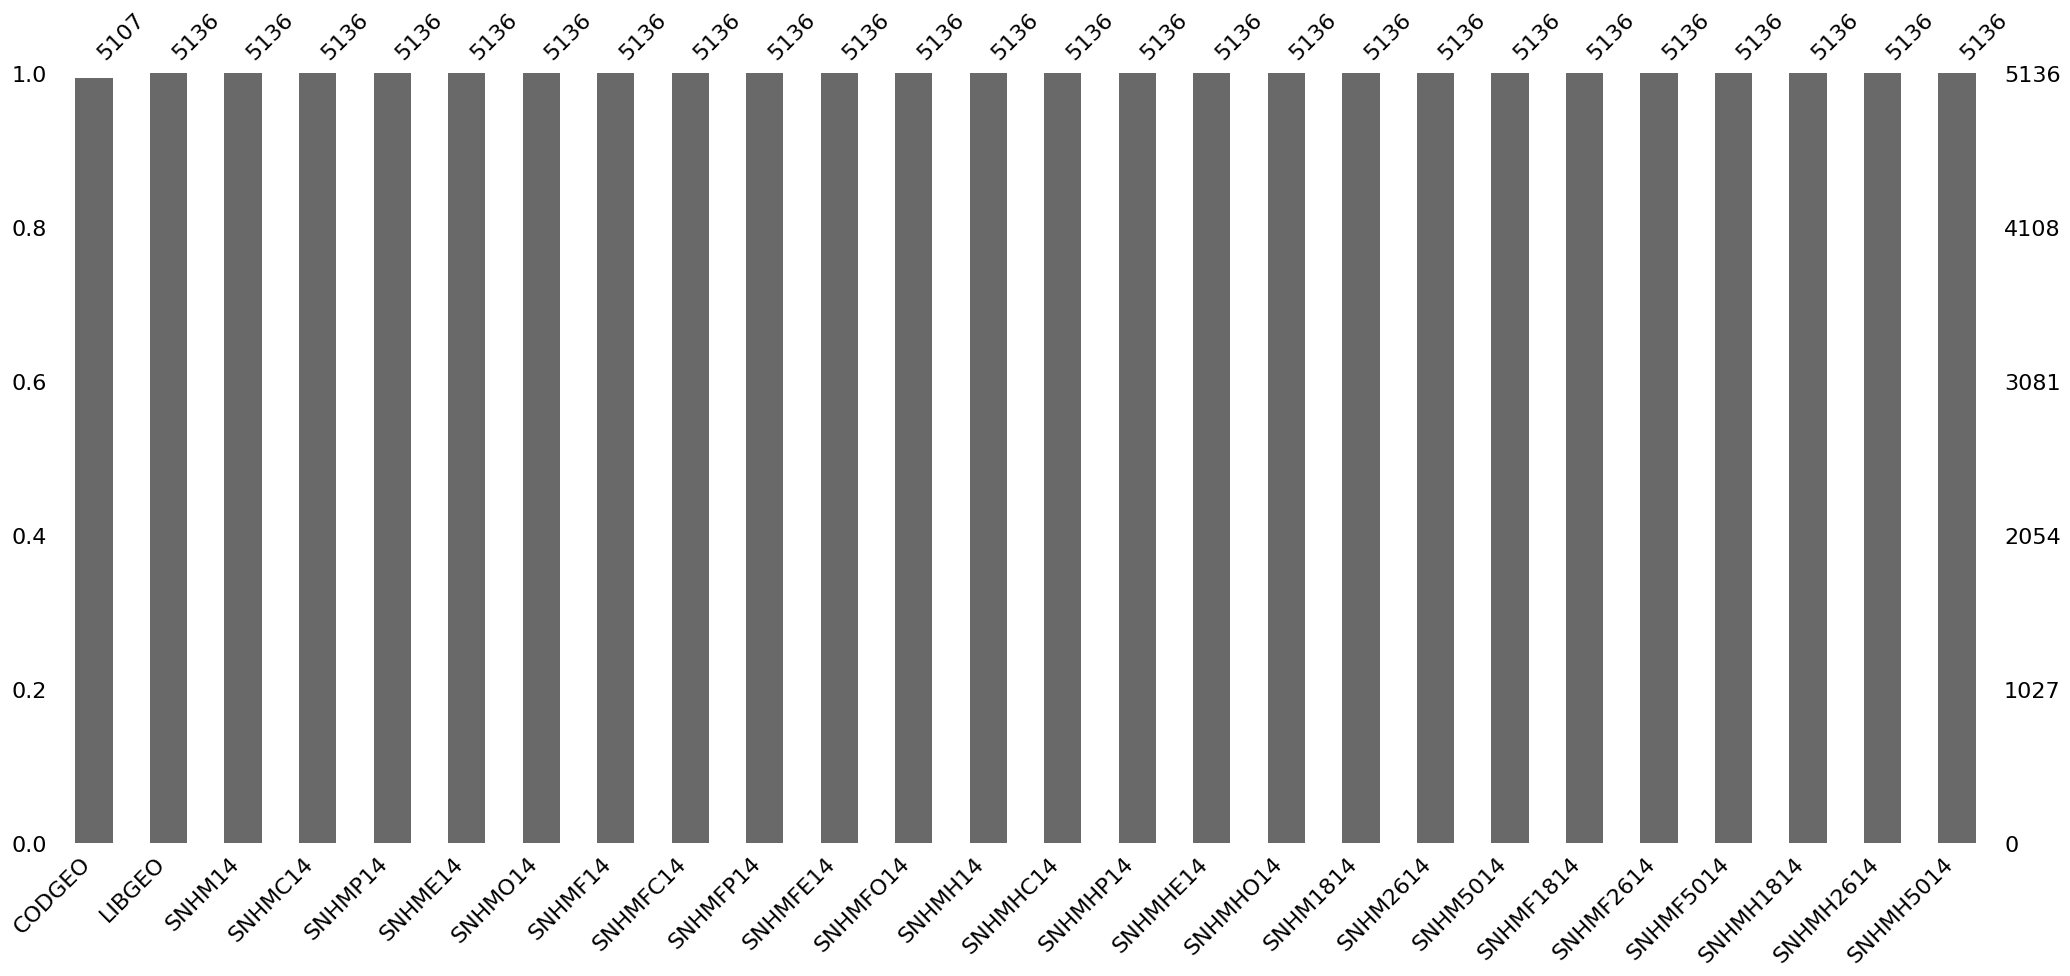

In [ ]:
msno.bar(salary_data)

In [ ]:
# Identify rows with any missing values
rows_with_any_missing_values = salary_data[salary_data.isnull().any(axis=1)]

# Print the result as a DataFrame
print("Rows with any missing values:")
print(rows_with_any_missing_values.to_string(index=False))  # to_string() formats output for better readability

Rows with any missing values:
 CODGEO               LIBGEO  SNHM14  SNHMC14  SNHMP14  SNHME14  SNHMO14  SNHMF14  SNHMFC14  SNHMFP14  SNHMFE14  SNHMFO14  SNHMH14  SNHMHC14  SNHMHP14  SNHMHE14  SNHMHO14  SNHM1814  SNHM2614  SNHM5014  SNHMF1814  SNHMF2614  SNHMF5014  SNHMH1814  SNHMH2614  SNHMH5014
    NaN                  Afa    13.8     24.0     15.7     10.9     10.9     12.3      19.8      14.0      10.4       9.6     14.9      26.4      16.9      11.8      11.1       9.8      13.6      16.8        9.6       12.3       13.6        9.9       14.7       19.0
    NaN              Ajaccio    13.0     22.8     15.4     10.5     10.7     11.9      19.8      14.1      10.3       8.8     13.8      24.6      16.4      10.9      11.0       9.5      12.5      15.3        9.2       11.6       13.6        9.8       13.3       16.6
    NaN                Alata    13.5     22.4     15.6     10.8     11.2     12.4      19.9      14.0      10.7       8.9     14.3      24.0      16.7      11.0      11.

In [ ]:
# Drop rows where CODGEO is missing
salary_data = salary_data.dropna(subset=['CODGEO'])

# Display the cleaned dataset
print("Data After Dropping Rows with Missing CODGEO Values:")
salary_data.head()

Data After Dropping Rows with Missing CODGEO Values:


,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
0,1004.0,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,1007.0,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,1014.0,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6
3,1024.0,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9
4,1025.0,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9


## **Handle Outliers**

<Axes: >

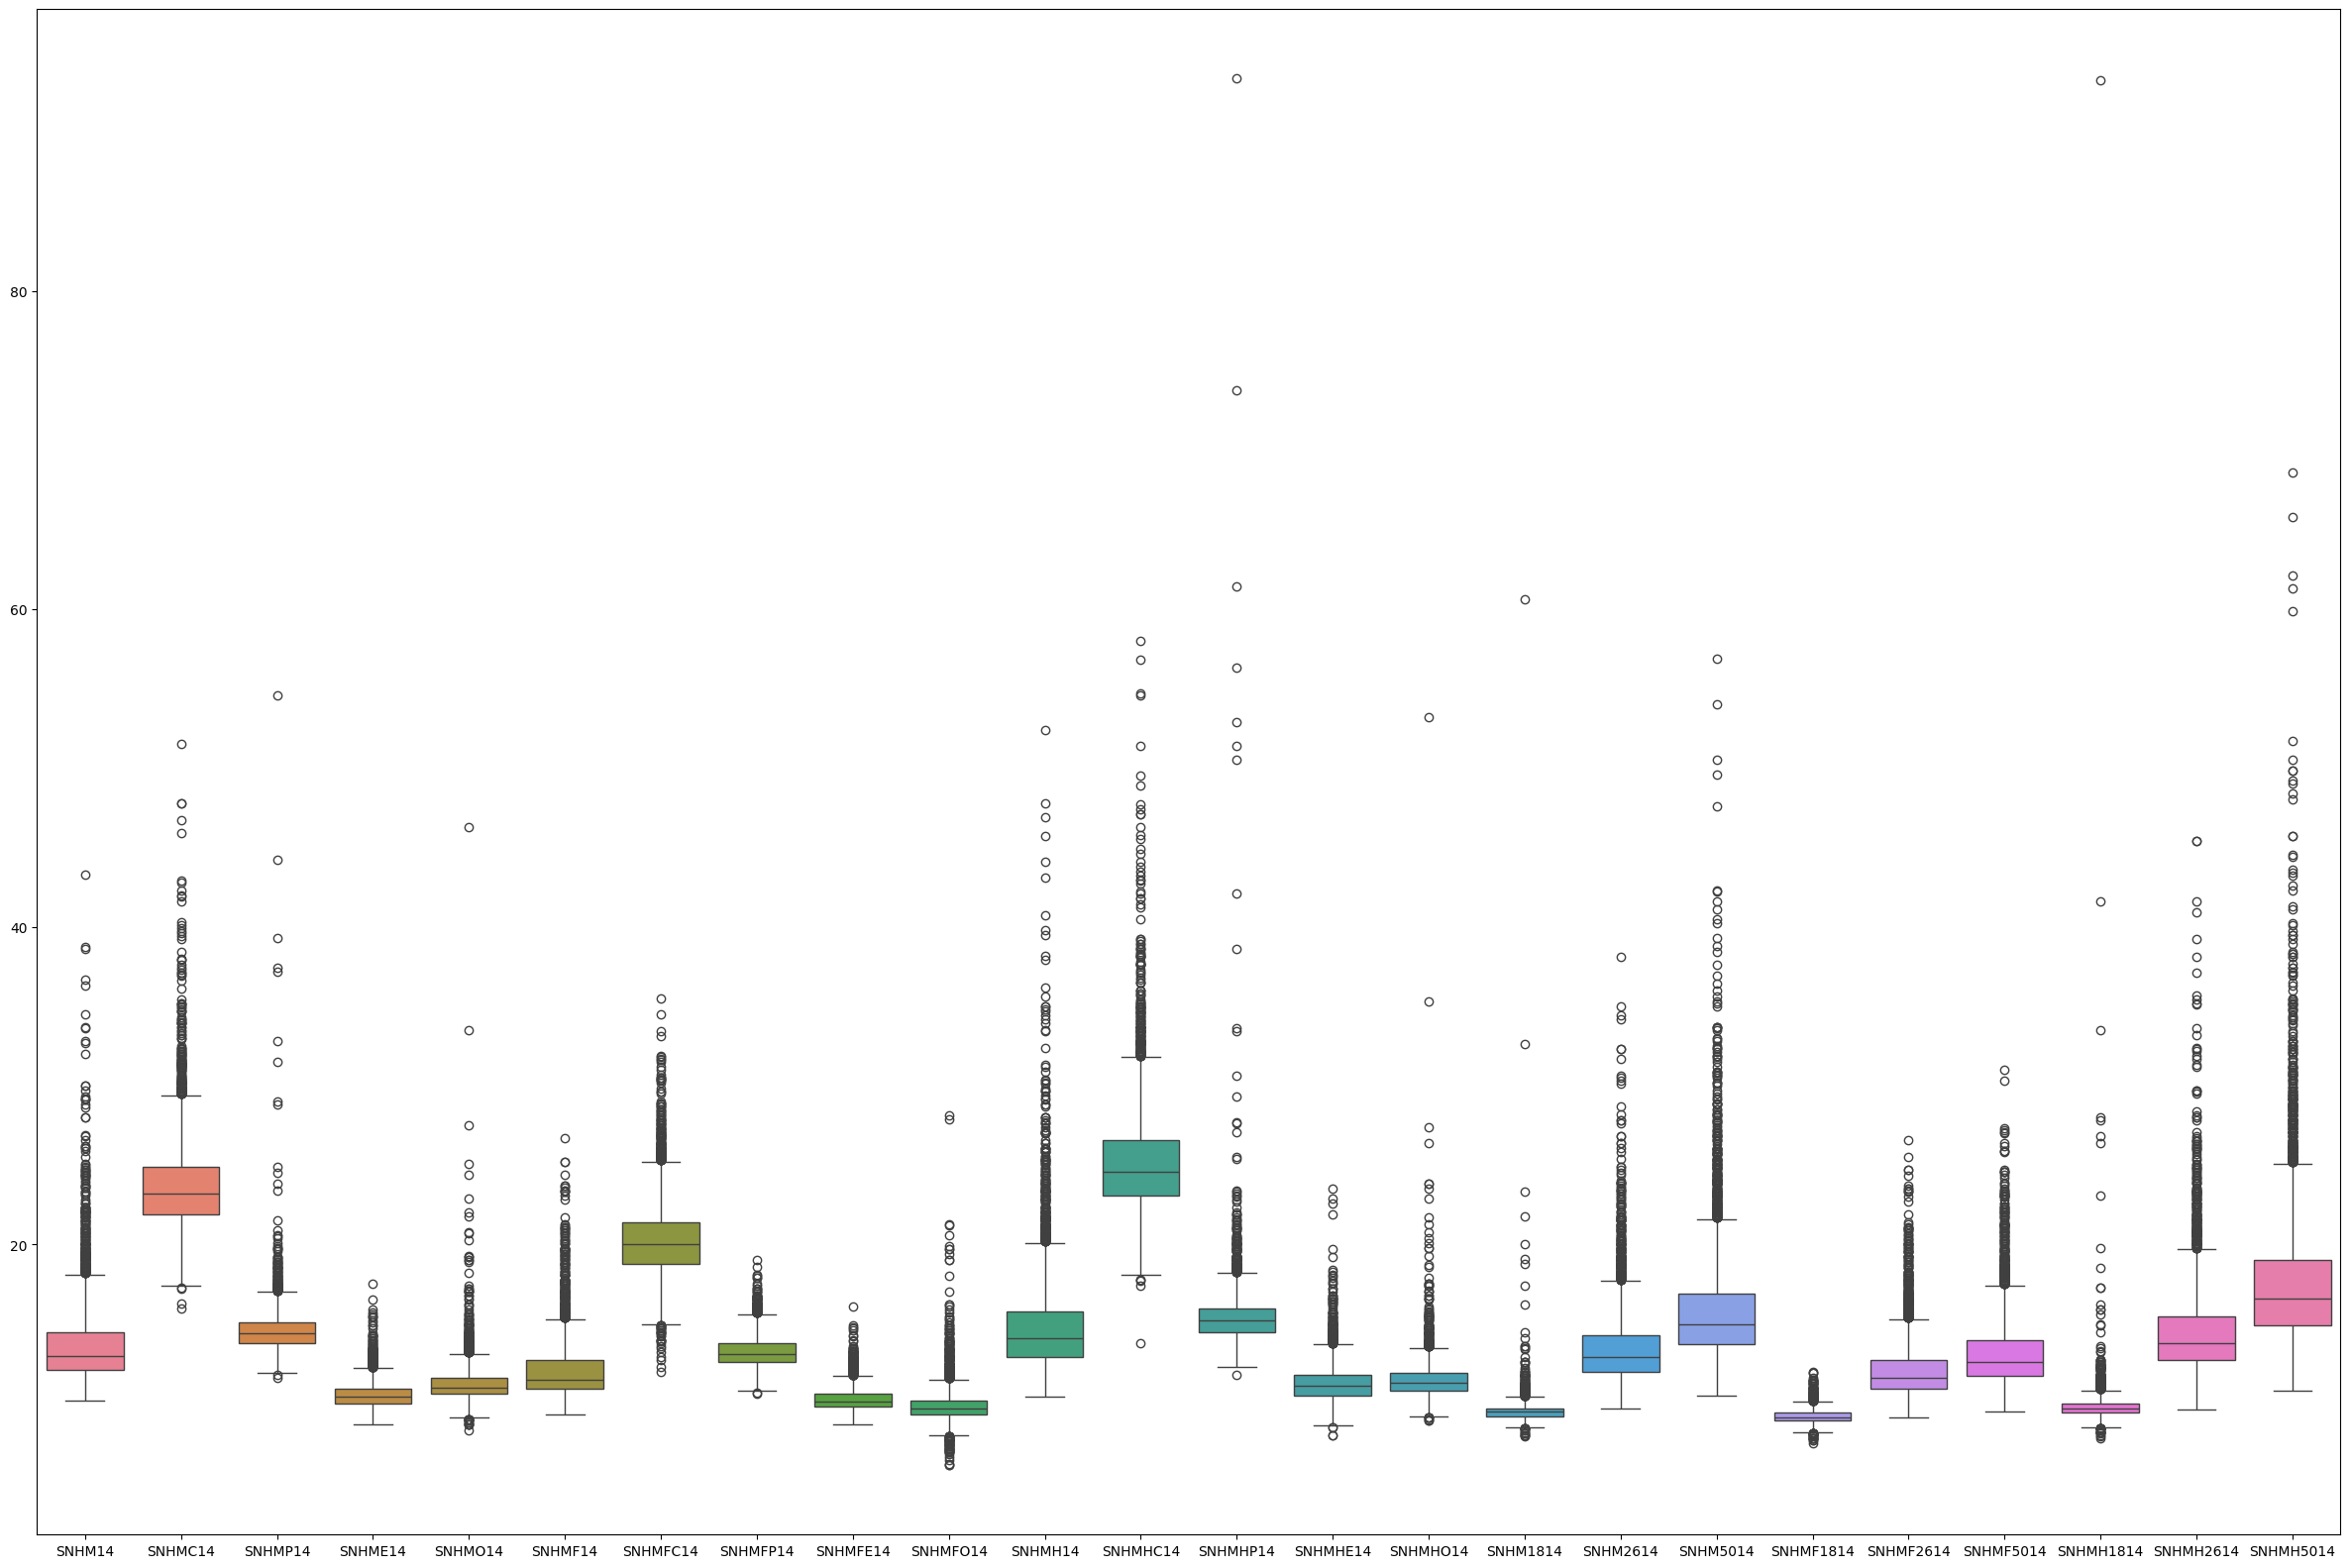

In [ ]:
plt.figure(figsize=(30,20))

# Specify the correct column names in a list format
columns_to_plot = ['SNHM14', 'SNHMC14', 'SNHMP14', 'SNHME14',
       'SNHMO14', 'SNHMF14', 'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14',
       'SNHMH14', 'SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14', 'SNHM1814',
       'SNHM2614', 'SNHM5014', 'SNHMF1814', 'SNHMF2614', 'SNHMF5014',
       'SNHMH1814', 'SNHMH2614', 'SNHMH5014']

# Use the correct syntax to select and plot multiple columns
sns.boxplot(data=salary_data[columns_to_plot])

In [ ]:
#Define the Function to Cap Outliers
def cap_outliers(data, column):
    Q1 = salary_data[column].quantile(0.25)
    Q3 = salary_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    salary_data[column] = salary_data[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return data

#List of Numeric Columns
numeric_columns =  ['SNHM14', 'SNHMC14', 'SNHMP14', 'SNHME14',
       'SNHMO14', 'SNHMF14', 'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14',
       'SNHMH14', 'SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14', 'SNHM1814',
       'SNHM2614', 'SNHM5014', 'SNHMF1814', 'SNHMF2614', 'SNHMF5014',
       'SNHMH1814', 'SNHMH2614', 'SNHMH5014']

#Loop Through Each Column and Cap Outliers
for column in numeric_columns:
    salary_data = cap_outliers(salary_data, column)

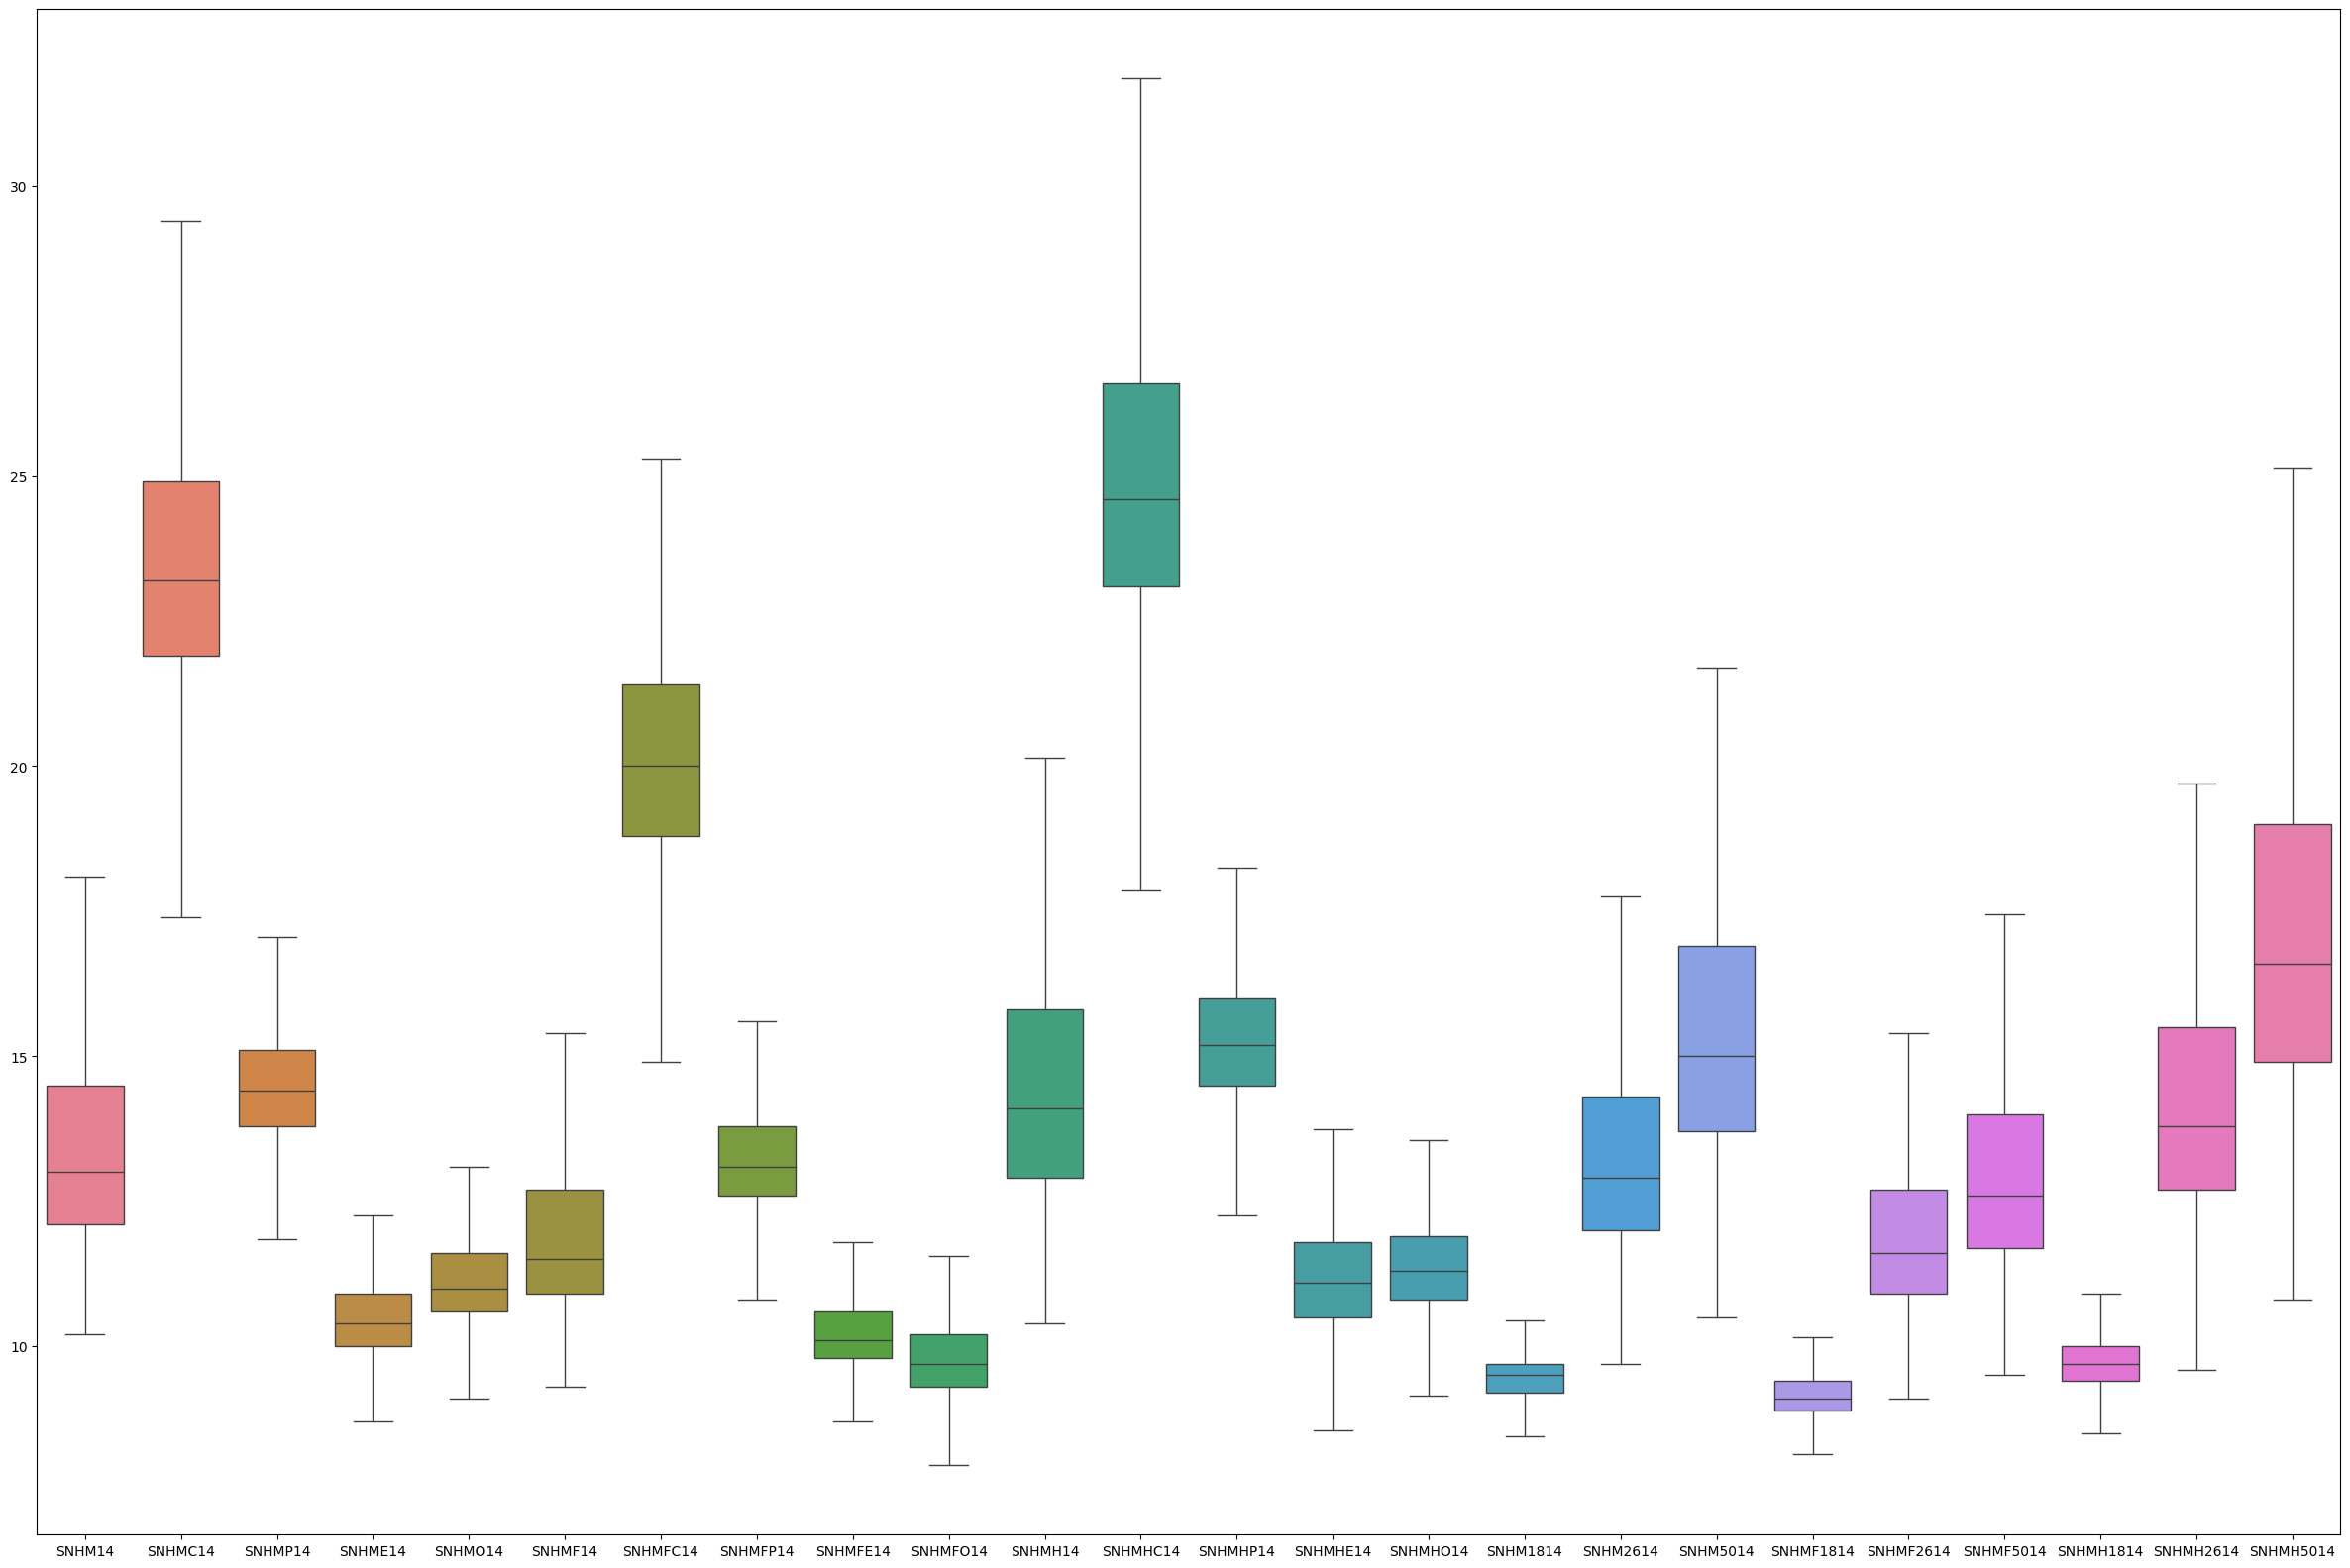

In [ ]:
plt.figure(figsize=(30, 20))

# Specify the correct column names in a list format
columns_to_plot = ['SNHM14', 'SNHMC14', 'SNHMP14', 'SNHME14',
       'SNHMO14', 'SNHMF14', 'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14',
       'SNHMH14', 'SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14', 'SNHM1814',
       'SNHM2614', 'SNHM5014', 'SNHMF1814', 'SNHMF2614', 'SNHMF5014',
       'SNHMH1814', 'SNHMH2614', 'SNHMH5014']

# Use the correct syntax to select and plot multiple columns
sns.boxplot(data=salary_data[columns_to_plot])

plt.show()

##**Descriptive Statistics**

**1.1 | Summary Statistics of numeric variables**

In [ ]:
desc_stats = salary_data.describe().T

# Create a custom style for the DataFrame visualization
def custom_style(val):
    color = '#606ff0'
    return f'background-color: {color}; color: white'

# Apply the custom style to the whole DataFrame
styled_desc_stats = desc_stats.style.applymap(custom_style)

# Apply background gradient to 'std' column using 'PuBu' colormap
styled_desc_stats = styled_desc_stats.background_gradient(subset=['std'], cmap='PuBu')

# Apply background gradient to '50%' column using 'PuBu' colormap
styled_desc_stats = styled_desc_stats.background_gradient(subset=['50%'], cmap='PuBu')

# Display the styled descriptive statistics DataFrame
styled_desc_stats


,count,mean,std,min,25%,50%,75%,max
CODGEO,5107.000000,52531.824946,25781.402402,1004.000000,33036.500000,56132.000000,74088.000000,97424.000000
SNHM14,5107.000000,13.533327,1.870298,10.200000,12.100000,13.000000,14.500000,18.100000
SNHMC14,5107.000000,23.586861,2.357780,17.400000,21.900000,23.200000,24.900000,29.400000
SNHMP14,5107.000000,14.508224,0.993417,11.850000,13.800000,14.400000,15.100000,17.050000
SNHME14,5107.000000,10.533180,0.703042,8.700000,10.000000,10.400000,10.900000,12.250000
SNHMO14,5107.000000,11.169140,0.795263,9.100000,10.600000,11.000000,11.600000,13.100000
SNHMF14,5107.000000,11.935853,1.418690,9.300000,10.900000,11.500000,12.700000,15.400000
SNHMFC14,5107.000000,20.168886,2.114840,14.900000,18.800000,20.000000,21.400000,25.300000
SNHMFP14,5107.000000,13.258586,0.940309,10.800000,12.600000,13.100000,13.800000,15.600000
SNHMFE14,5107.000000,10.278108,0.651172,8.700000,9.800000,10.100000,10.600000,11.800000



**1.2 | Summary Statistics of categorical variables**

In [ ]:
#Display the summary statistics for categorical columns
categorical_summary = salary_data.select_dtypes(include=object).describe()
display(categorical_summary)

,LIBGEO
count,5107
unique,5056
top,Sainte-Marie
freq,4


In [ ]:
skim(salary_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5107   │ │ float64     │ 25    │                                                          │
│ │ Number of columns │ 26     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd       ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ CODGEO         │   0 │      0 │   52530 │    25780 │    1004 │  33040 │  56130 │  74090 │  97420 │ ▅▆▇▇▇▆  │  │
│ │ SNHM14         │   0 │      0 │   13.53 │     1.87 │    10.2 │   12.1 │     13 │   14.5 │   18.1 │ ▂▇▆▃▂▂  │  │
│ │ SNHMC14        │   0 │      0 │   23.59 │    2.358 │    17.4 │   21.9 │   23.2 │   24.9 │   29.4 │  ▃▇▆▃▂  │  │
│ │ SNHMP14        │   0 │      0 │   14.51 │   0.9934 │   11.85 │   13.8 │   14.4 │   15.1 │  17.05 │  ▃▇▆▂▂  │  │
│ │ SNHME14        │   0 │      0 │   10.53 │    0.703 │     8.7 │     10 │   10.4 │   10.9 │  12.25 │  ▃▇▅▂▂  │  │
│ │ SNHMO14        │   0 │      0 │   11.17 │   0.7953 │     9.1 │   10.6 │     11 │   11.6 │   13.1 │  ▃▇▇▃▂  │  │
│ │ SNHMF14        │   0 │      0 │   11.94 │    1.419 │     9.3 │   10.9 │   11.5 │   12.7 │   15.4 │ ▂▇▆▃▂▂  │  │
│ │ SNHMFC14       │   0 │      0 │   20.17 │    2.115 │    14.9 │   18.8 │     20 │   21.4 │   25.3 │ ▁▃▇▇▃▂  │  │
│ │ SNHMFP14       │   0 │      0 │   13.26 │   0.9403 │    10.8 │   12.6 │   13.1 │   13.8 │   15.6 │  ▃▇▆▃▂  │  │
│ │ SNHMFE14       │   0 │      0 │   10.28 │   0.6512 │     8.7 │    9.8 │   10.1 │   10.6 │   11.8 │  ▅▇▅▂▂  │  │
│ │ SNHMFO14       │   0 │      0 │   9.766 │   0.7663 │    7.95 │    9.3 │    9.7 │   10.2 │  11.55 │ ▁▃▇▆▂▂  │  │
│ │ SNHMH14        │   0 │      0 │   14.63 │    2.269 │    10.4 │   12.9 │   14.1 │   15.8 │  20.15 │ ▂▇▆▃▂▂  │  │
│ │ SNHMHC14       │   0 │      0 │   25.04 │    2.791 │   17.85 │   23.1 │   24.6 │   26.6 │  31.85 │  ▃▇▆▃▂  │  │
│ │ SNHMHP14       │   0 │      0 │   15.36 │    1.176 │   12.25 │   14.5 │   15.2 │     16 │  18.25 │  ▃▇▆▃▂  │  │
│ │ SNHMHE14       │   0 │      0 │   11.23 │   0.9694 │    8.55 │   10.5 │   11.1 │   11.8 │  13.75 │  ▂▇▆▂▂  │  │
│ │ SNHMHO14       │   0 │      0 │   11.43 │   0.8264 │    9.15 │   10.8 │   11.3 │   11.9 │  13.55 │  ▃▇▆▃▂  │  │
│ │ SNHM1814       │   0 │      0 │   9.502 │   0.4068 │    8.45 │    9.2 │    9.5 │    9.7 │  10.45 │  ▅▇▇▃▂  │  │
│ │ SNHM2614       │   0 │      0 │   13.35 │    1.807 │     9.7 │     12 │   12.9 │   14.3 │  17.75 │ ▁▇▇▅▂▂  │  │
│ │ SNHM5014       │   0 │      0 │   15.61 │    2.589 │    10.5 │   13.7 │     15 │   16.9 │   21.7 │ ▁▇▇▃▂▂  │  │
│ │ SNHMF1814      │   0 │      0 │   9.151 │   0.4119 │    8.15 │    8.9 │    9.1 │    9.4 │  10.15 │ ▁▅▇▆▃▂  │  │
│ │ SNHMF2614      │   0 │      0 │   11.95 │    1.452 │     9.1 │   10.9 │   11.6 │   12.7 │   15.4 │ ▁▇▇▃▂▂  │  │
│ │ SNHMF5014      │   0 │      0 │   13.05 │    1.836 │     9.5 │   11.7 │   12.6 │     14 │  17.45 │ ▂▇▇▃▂▂  │  │
│ │ SNHMH1814      │   0 │      0 │   9.746 │   0.5006 │

## **Data Visualization**

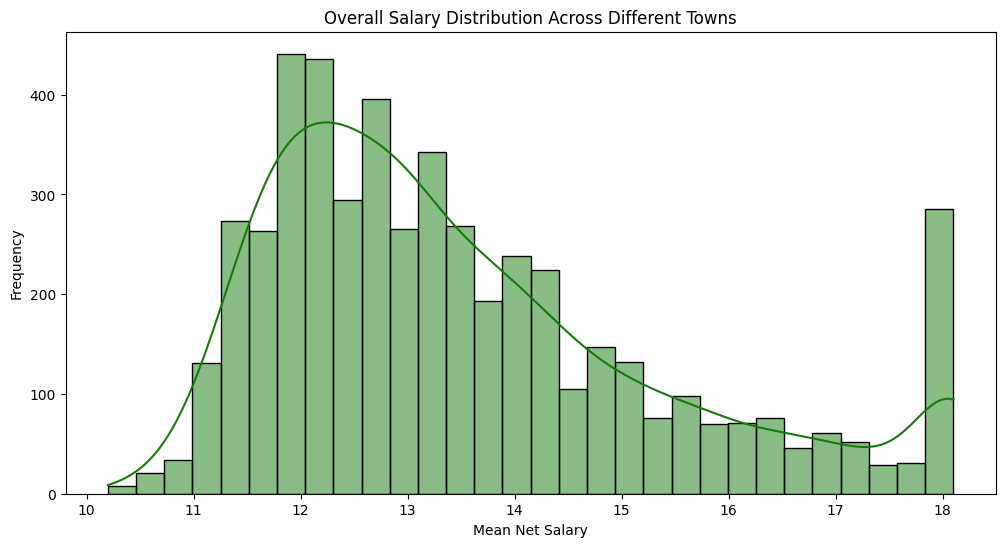

In [ ]:
# 1. Overall Salary Distribution Across Different Towns
plt.figure(figsize=(12, 6))
sns.histplot(salary_data['SNHM14'], bins=30, kde=True, color = '#177a0d')
plt.title('Overall Salary Distribution Across Different Towns')
plt.xlabel('Mean Net Salary')
plt.ylabel('Frequency')
plt.show()

<ipython-input-25-97710462b010>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=role_labels, y=role_means, palette=colors)


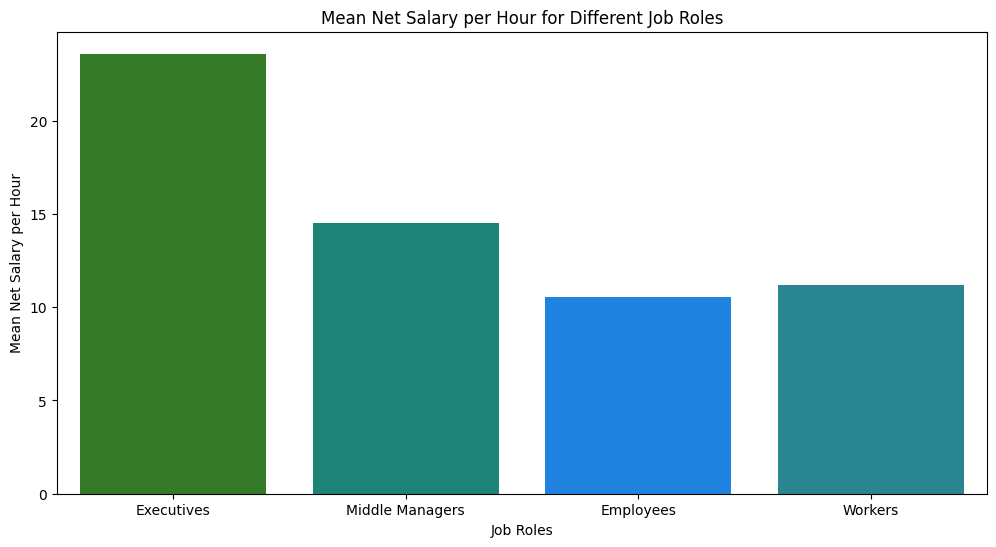

In [ ]:
# 2. Wage Disparities Between Different Job Roles
roles = ['SNHMC14', 'SNHMP14', 'SNHME14', 'SNHMO14']
role_labels = ['Executives', 'Middle Managers', 'Employees', 'Workers']
role_means = [salary_data[role].mean() for role in roles]

# Custom colors
colors = ['#2b871c', '#0d9484', '#0084ff', '#1893a1']

plt.figure(figsize=(12, 6))
sns.barplot(x=role_labels, y=role_means, palette=colors)
plt.title('Mean Net Salary per Hour for Different Job Roles')
plt.xlabel('Job Roles')
plt.ylabel('Mean Net Salary per Hour')
plt.show()

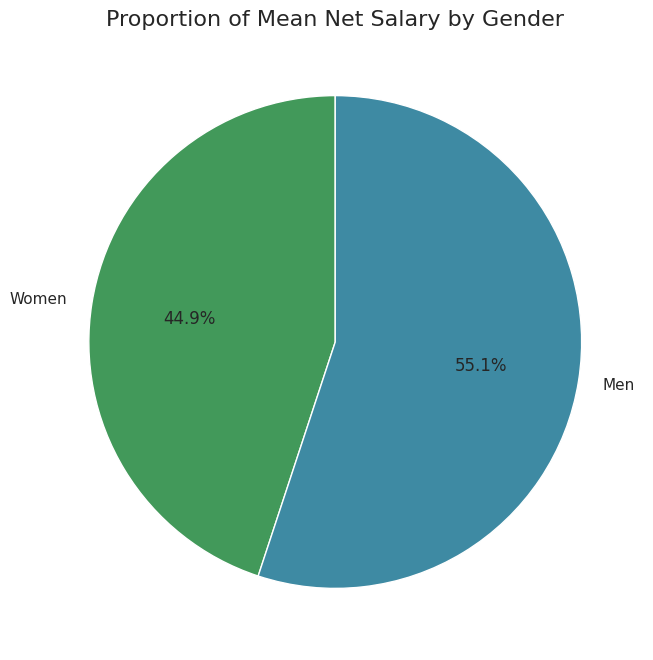

In [ ]:
# 3. Gender Pay Gap
gender_means = [salary_data[gender].mean() for gender in genders]

plt.figure(figsize=(8, 8))
plt.pie(gender_means, labels=gender_labels, autopct='%1.1f%%', colors=['#42995a','#3e8aa3'], startangle=90)
plt.title('Proportion of Mean Net Salary by Gender', fontsize=16)
plt.show()


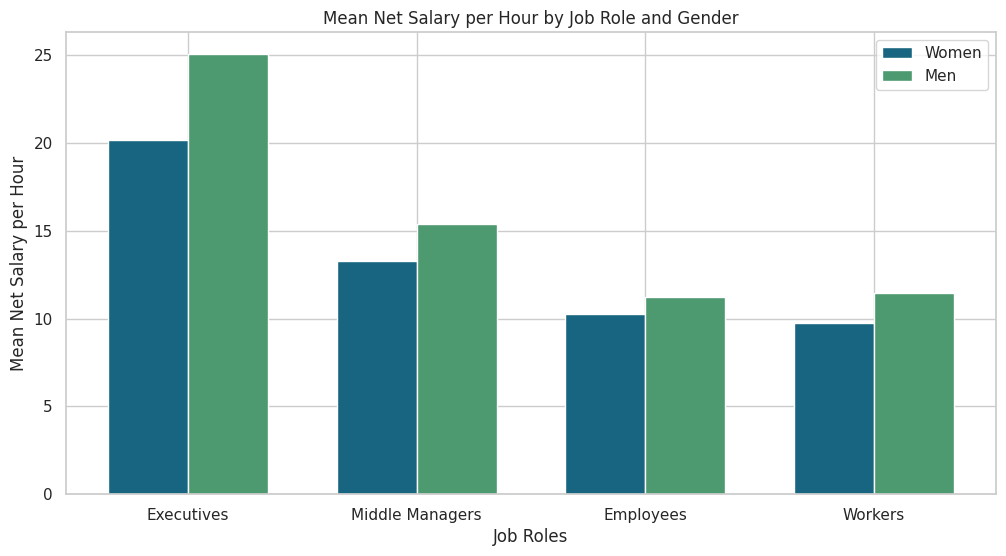

In [ ]:
# 4. Mean Net Salary for Different Job Roles by Gender
female_roles = ['SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14']
male_roles = ['SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14']

female_means = [salary_data[role].mean() for role in female_roles]
male_means = [salary_data[role].mean() for role in male_roles]

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = range(len(role_labels))

# Change the colors here
bar1 = plt.bar(index, female_means, bar_width, color='#176580', label='Women')
bar2 = plt.bar([p + bar_width for p in index], male_means, bar_width, color='#4d9970', label='Men')

plt.xlabel('Job Roles')
plt.ylabel('Mean Net Salary per Hour')
plt.title('Mean Net Salary per Hour by Job Role and Gender')
plt.xticks([p + bar_width/2 for p in index], role_labels)
plt.legend()
plt.show()


<ipython-input-44-92d88193a9fd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_labels, y=age_means, palette=colors)


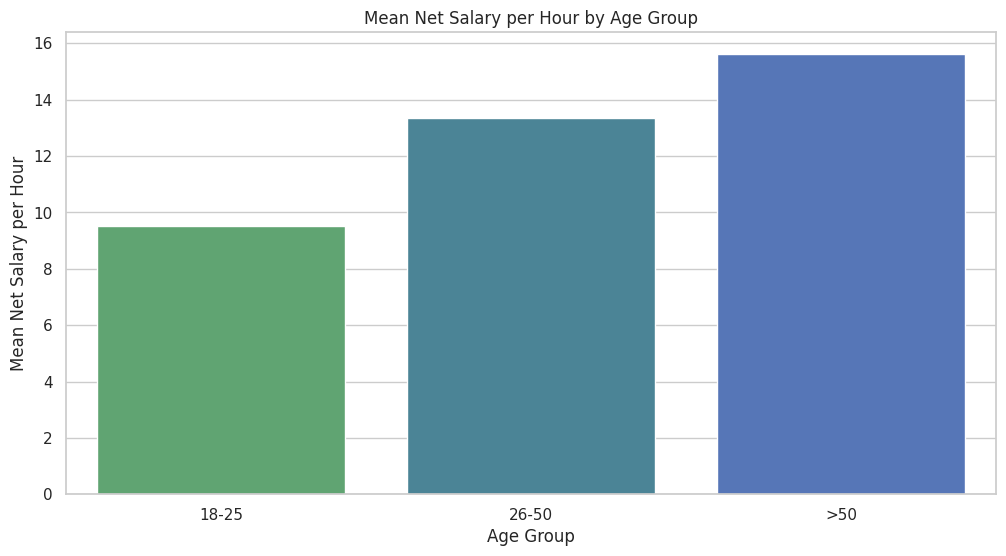

In [ ]:
# 5. Impact of Age on Salary
age_groups = ['SNHM1814', 'SNHM2614', 'SNHM5014']
age_labels = ['18-25', '26-50', '>50']
age_means = [salary_data[age].mean() for age in age_groups]
colors =['#54b06d','#3e8aa3', '#4671c7']

plt.figure(figsize=(12, 6))
sns.barplot(x=age_labels, y=age_means, palette=colors)
plt.title('Mean Net Salary per Hour by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Net Salary per Hour')
plt.show()


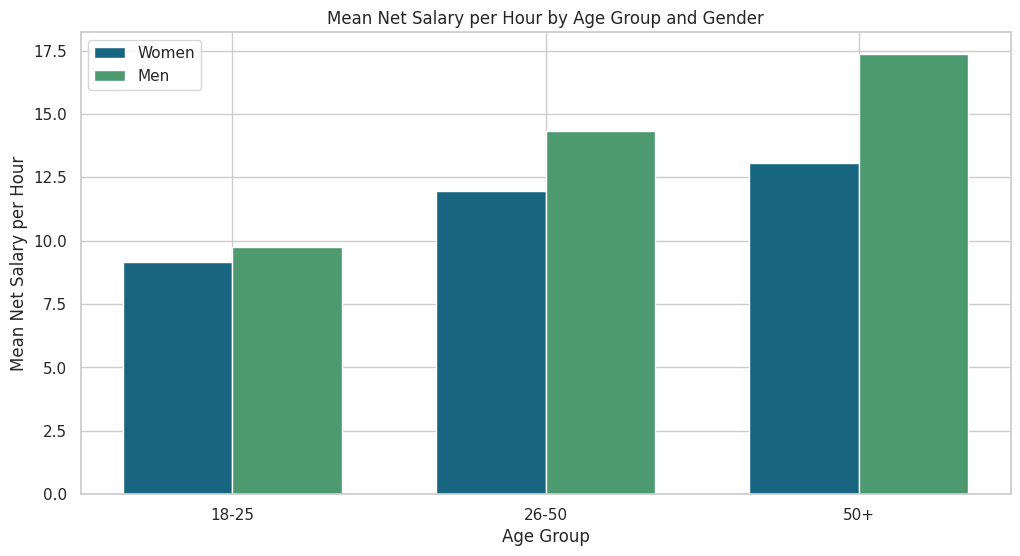

In [ ]:
# 6. Gender Pay Gap Across Age Groups
# Age groups and labels
female_ages = ['SNHMF1814', 'SNHMF2614', 'SNHMF5014']
male_ages = ['SNHMH1814', 'SNHMH2614', 'SNHMH5014']
age_labels = ['18-25', '26-50', '50+']

# Calculate mean salaries
female_age_means = [salary_data[age].mean() for age in female_ages]
male_age_means = [salary_data[age].mean() for age in male_ages]

# Define index for the age groups
index = np.arange(len(age_labels))

# Width of the bars
bar_width = 0.35

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(index, female_age_means, bar_width, label='Women',  color='#176580')
bar2 = ax.bar(index + bar_width, male_age_means, bar_width, label='Men', color='#4d9970')

# Adding labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Mean Net Salary per Hour')
ax.set_title('Mean Net Salary per Hour by Age Group and Gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(age_labels)
ax.legend()

# Show the plot
plt.show()